# Diabetes Re-admission

# Problem Statement
As the healthcare system moves toward value-based care, CMS has created many programs to improve
the quality of care of patients. One of these programs is called the Hospital Readmission Reduction
Program (HRRP), which reduces reimbursement to hospitals with above-average readmissions. For those
hospitals which are currently penalized under this program, one solution is to create interventions to
provide additional assistance to patients with increased risk of readmission. But how do we identify these
patients? We can use predictive modeling from data science to help prioritize patients.

One patient population that is at increased risk of hospitalization and readmission is that of diabetes. Diabetes
is a medical condition that affects approximately 1 in 10 patients in the United States. According to Ostling et al,
patients with diabetes have almost double the chance of being hospitalized than the general population (Ostling
et al 2017).

Predict if a patient with diabetes will be readmitted to the hospital within 30 days.
It contains 101,766 instances (patients) that are classified into three classes: 0 means no readmission, 1 means
readmission in less than 30 days, and 2 means readmission in more than 30 days.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Diabetes Re-admission.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100761,430292744,84570804,Caucasian,Female,[50-60),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,0
100762,430307540,120343568,Other,Female,[70-80),?,2,3,1,5,...,No,Down,No,No,No,No,No,Ch,Yes,0
100763,430307870,160311758,Caucasian,Female,[80-90),?,1,3,7,5,...,No,Steady,No,No,No,No,No,Ch,Yes,0
100764,430745762,84325185,Caucasian,Female,[80-90),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,1


In [3]:
df.shape

(100766, 47)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100766 entries, 0 to 100765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100766 non-null  int64 
 1   patient_nbr               100766 non-null  int64 
 2   race                      100766 non-null  object
 3   gender                    100766 non-null  object
 4   age                       100766 non-null  object
 5   weight                    100766 non-null  object
 6   admission_type_id         100766 non-null  int64 
 7   discharge_disposition_id  100766 non-null  int64 
 8   admission_source_id       100766 non-null  int64 
 9   time_in_hospital          100766 non-null  int64 
 10  payer_code                100766 non-null  object
 11  medical_specialty         100766 non-null  object
 12  num_lab_procedures        100766 non-null  int64 
 13  num_procedures            100766 non-null  int64 
 14  num_

In [5]:
print(df.isna().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [6]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [7]:
#Here missing Values are represented as ? sign
for col in df.columns:
         print(col,df[col][df[col] == '?'].count())

encounter_id 0
patient_nbr 0
race 2234
gender 0
age 0
weight 97606
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40115
medical_specialty 49269
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [8]:
#Target variable 'readmitted'
df['readmitted'].value_counts()

0    54233
1    46533
Name: readmitted, dtype: int64

Text(0, 0.5, 'Count')

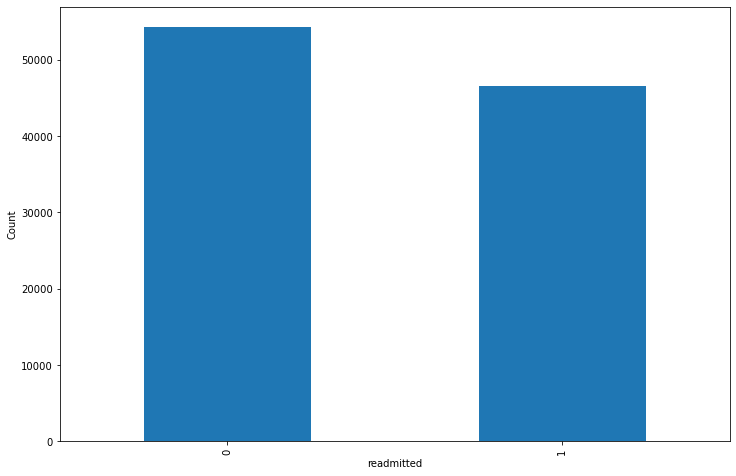

In [9]:
plt.figure(figsize=(12,8))
df.groupby('readmitted').size().plot(kind='bar',stacked=True)
plt.ylabel('Count')

## Dealing with missing values

In [10]:
df["weight"].value_counts()

?            97606
[75-100)      1326
[50-75)        884
[100-125)      616
[125-150)      143
[25-50)         97
[0-25)          48
[150-175)       32
[175-200)       11
>200             3
Name: weight, dtype: int64

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight', ylabel='count'>

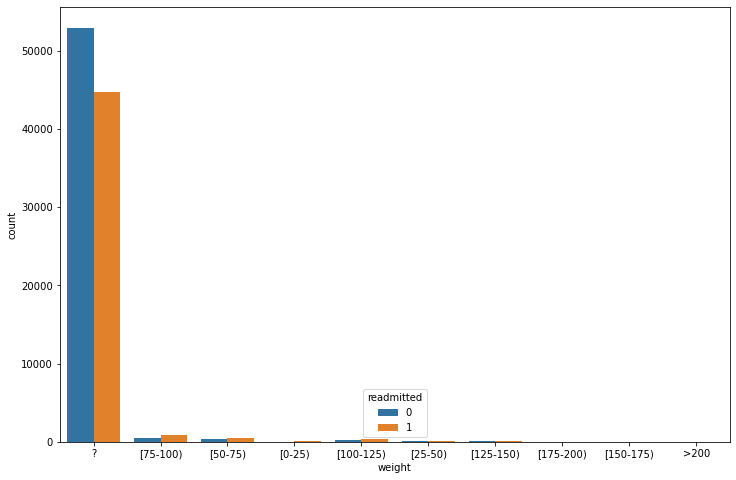

In [11]:
plt.figure(figsize=(12,8))
sns.countplot("weight",hue='readmitted',data=df)

weight contains approximate 90% + of the missing values. so we drop these variable.

In [12]:
df.drop("weight",axis=1,inplace=True)

In [13]:
df["payer_code"].value_counts()

?     40115
MC    31993
HM     6192
SP     4939
BC     4583
MD     3464
CP     2508
UN     2434
CM     1895
OG     1013
PO      584
DM      541
CH      142
WC      134
OT       95
MP       78
SI       55
FR        1
Name: payer_code, dtype: int64

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payer_code', ylabel='count'>

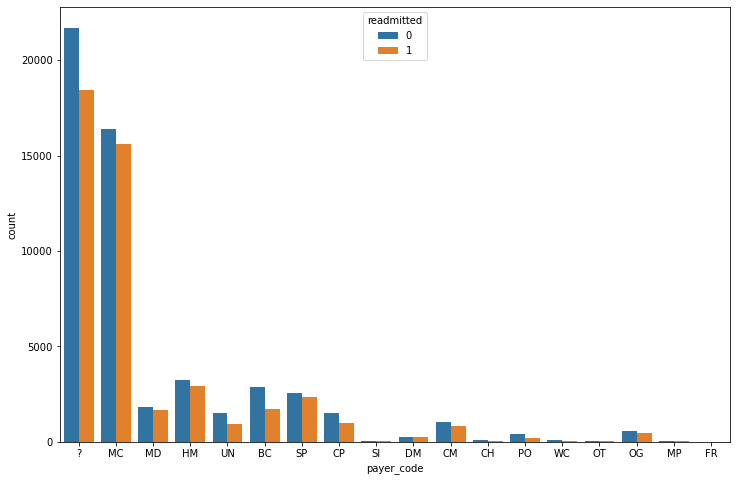

In [14]:
plt.figure(figsize=(12,8))
sns.countplot("payer_code",hue='readmitted',data=df)

In [15]:
df.drop("payer_code",axis=1,inplace=True)

Payer code contains approximate 40% + missing values so we dropped variable.

In [16]:
df["medical_specialty"].value_counts()

?                                   49269
InternalMedicine                    14563
Emergency/Trauma                     7477
Family/GeneralPractice               7416
Cardiology                           5321
                                    ...  
Proctology                              1
SportsMedicine                          1
Dermatology                             1
Neurophysiology                         1
Surgery-PlasticwithinHeadandNeck        1
Name: medical_specialty, Length: 73, dtype: int64

In [17]:
df.drop("medical_specialty",axis=1,inplace=True)

medical_specialty contains approximate 40% + missing values so we also dropped variable.

## EDA

In [18]:
# Removing irrelevant features from the dataset
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

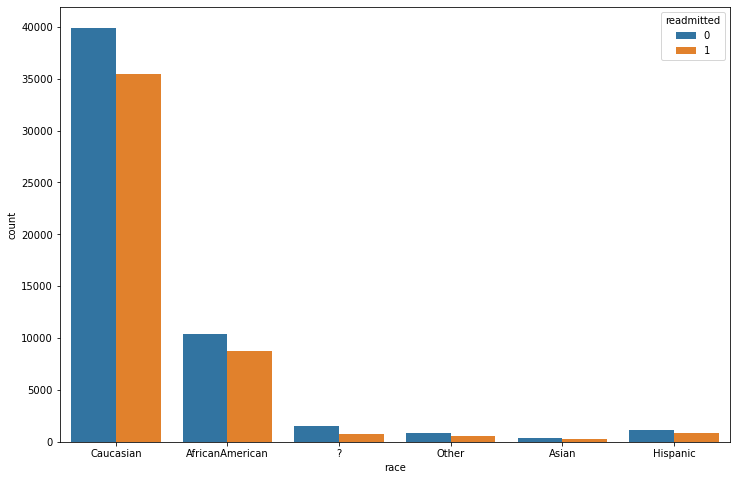

In [19]:
plt.figure(figsize=(12,8))
sns.countplot("race",hue="readmitted",data=df)

In [20]:
#we will replace the missing values of race with their respective mode.
df["race"]=df["race"].replace("?","Caucasian")

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

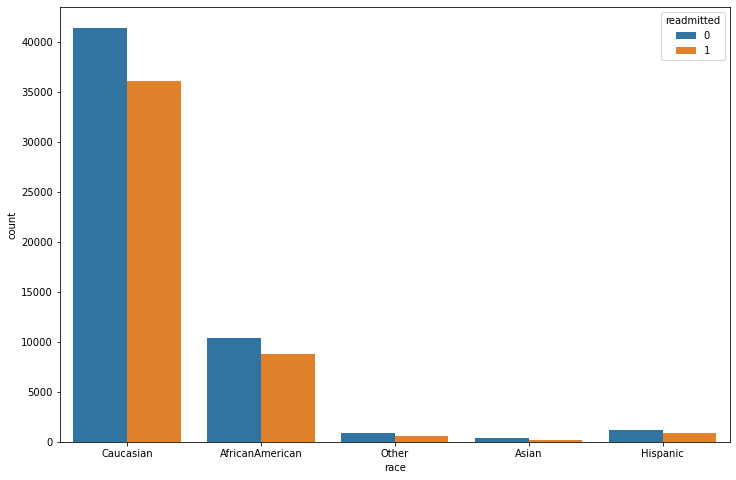

In [21]:
plt.figure(figsize=(12,8))
sns.countplot("race",hue="readmitted",data=df)

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

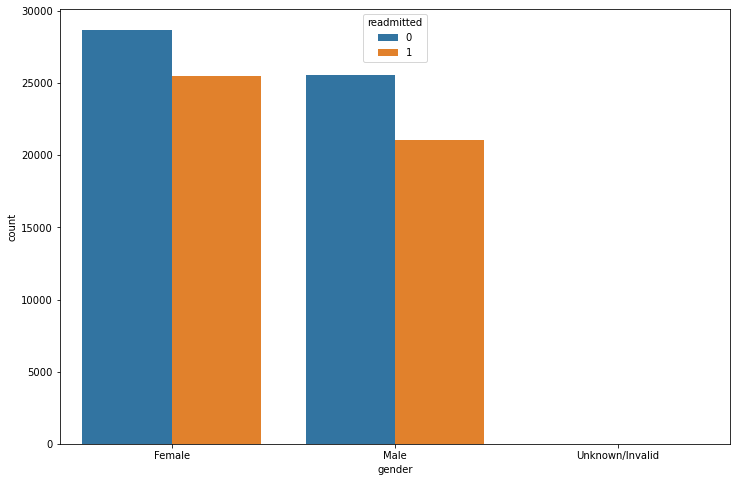

In [22]:
plt.figure(figsize=(12,8))
sns.countplot("gender",hue="readmitted",data=df)

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

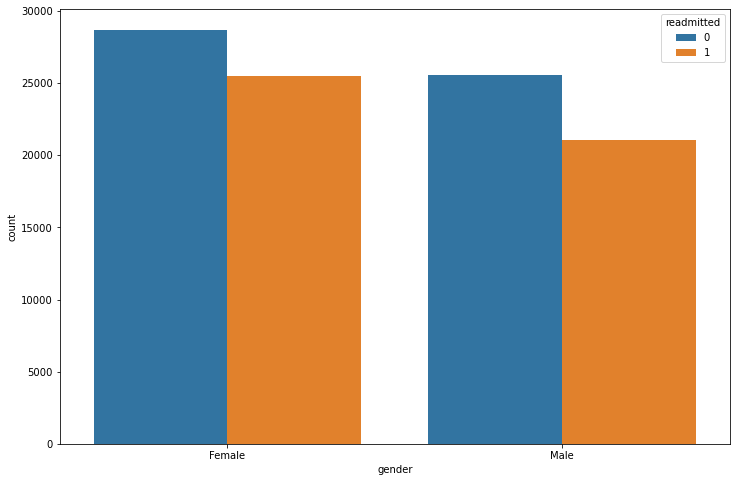

In [23]:
#we will gender the missing values of gender with their respective mode.
plt.figure(figsize=(12,8))
df["gender"]=df["gender"].replace("Unknown/Invalid","Female") 
sns.countplot("gender",hue="readmitted",data=df)

In [24]:
df["citoglipton"].value_counts()

No    100766
Name: citoglipton, dtype: int64

In [25]:
df["examide"].value_counts()

No    100766
Name: examide, dtype: int64

citoglipton and examide all records have the same value. So these cannot provide any interpretive or discriminatory information for predicting readmission so we drop these two variables.

In [26]:
df.drop(["citoglipton", "examide"],axis=1,inplace=True)

In [27]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       686
[20-30)      1644
[30-40)      3739
[40-50)      9590
[50-60)     17109
[60-70)     22293
[70-80)     25771
[80-90)     17019
[90-100)     2755
dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

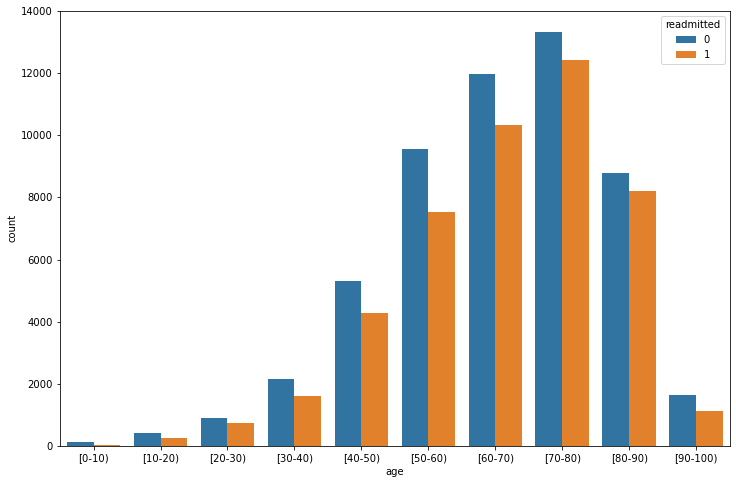

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x ='age', hue = "readmitted", data = df)

Text(0, 0.5, 'Count')

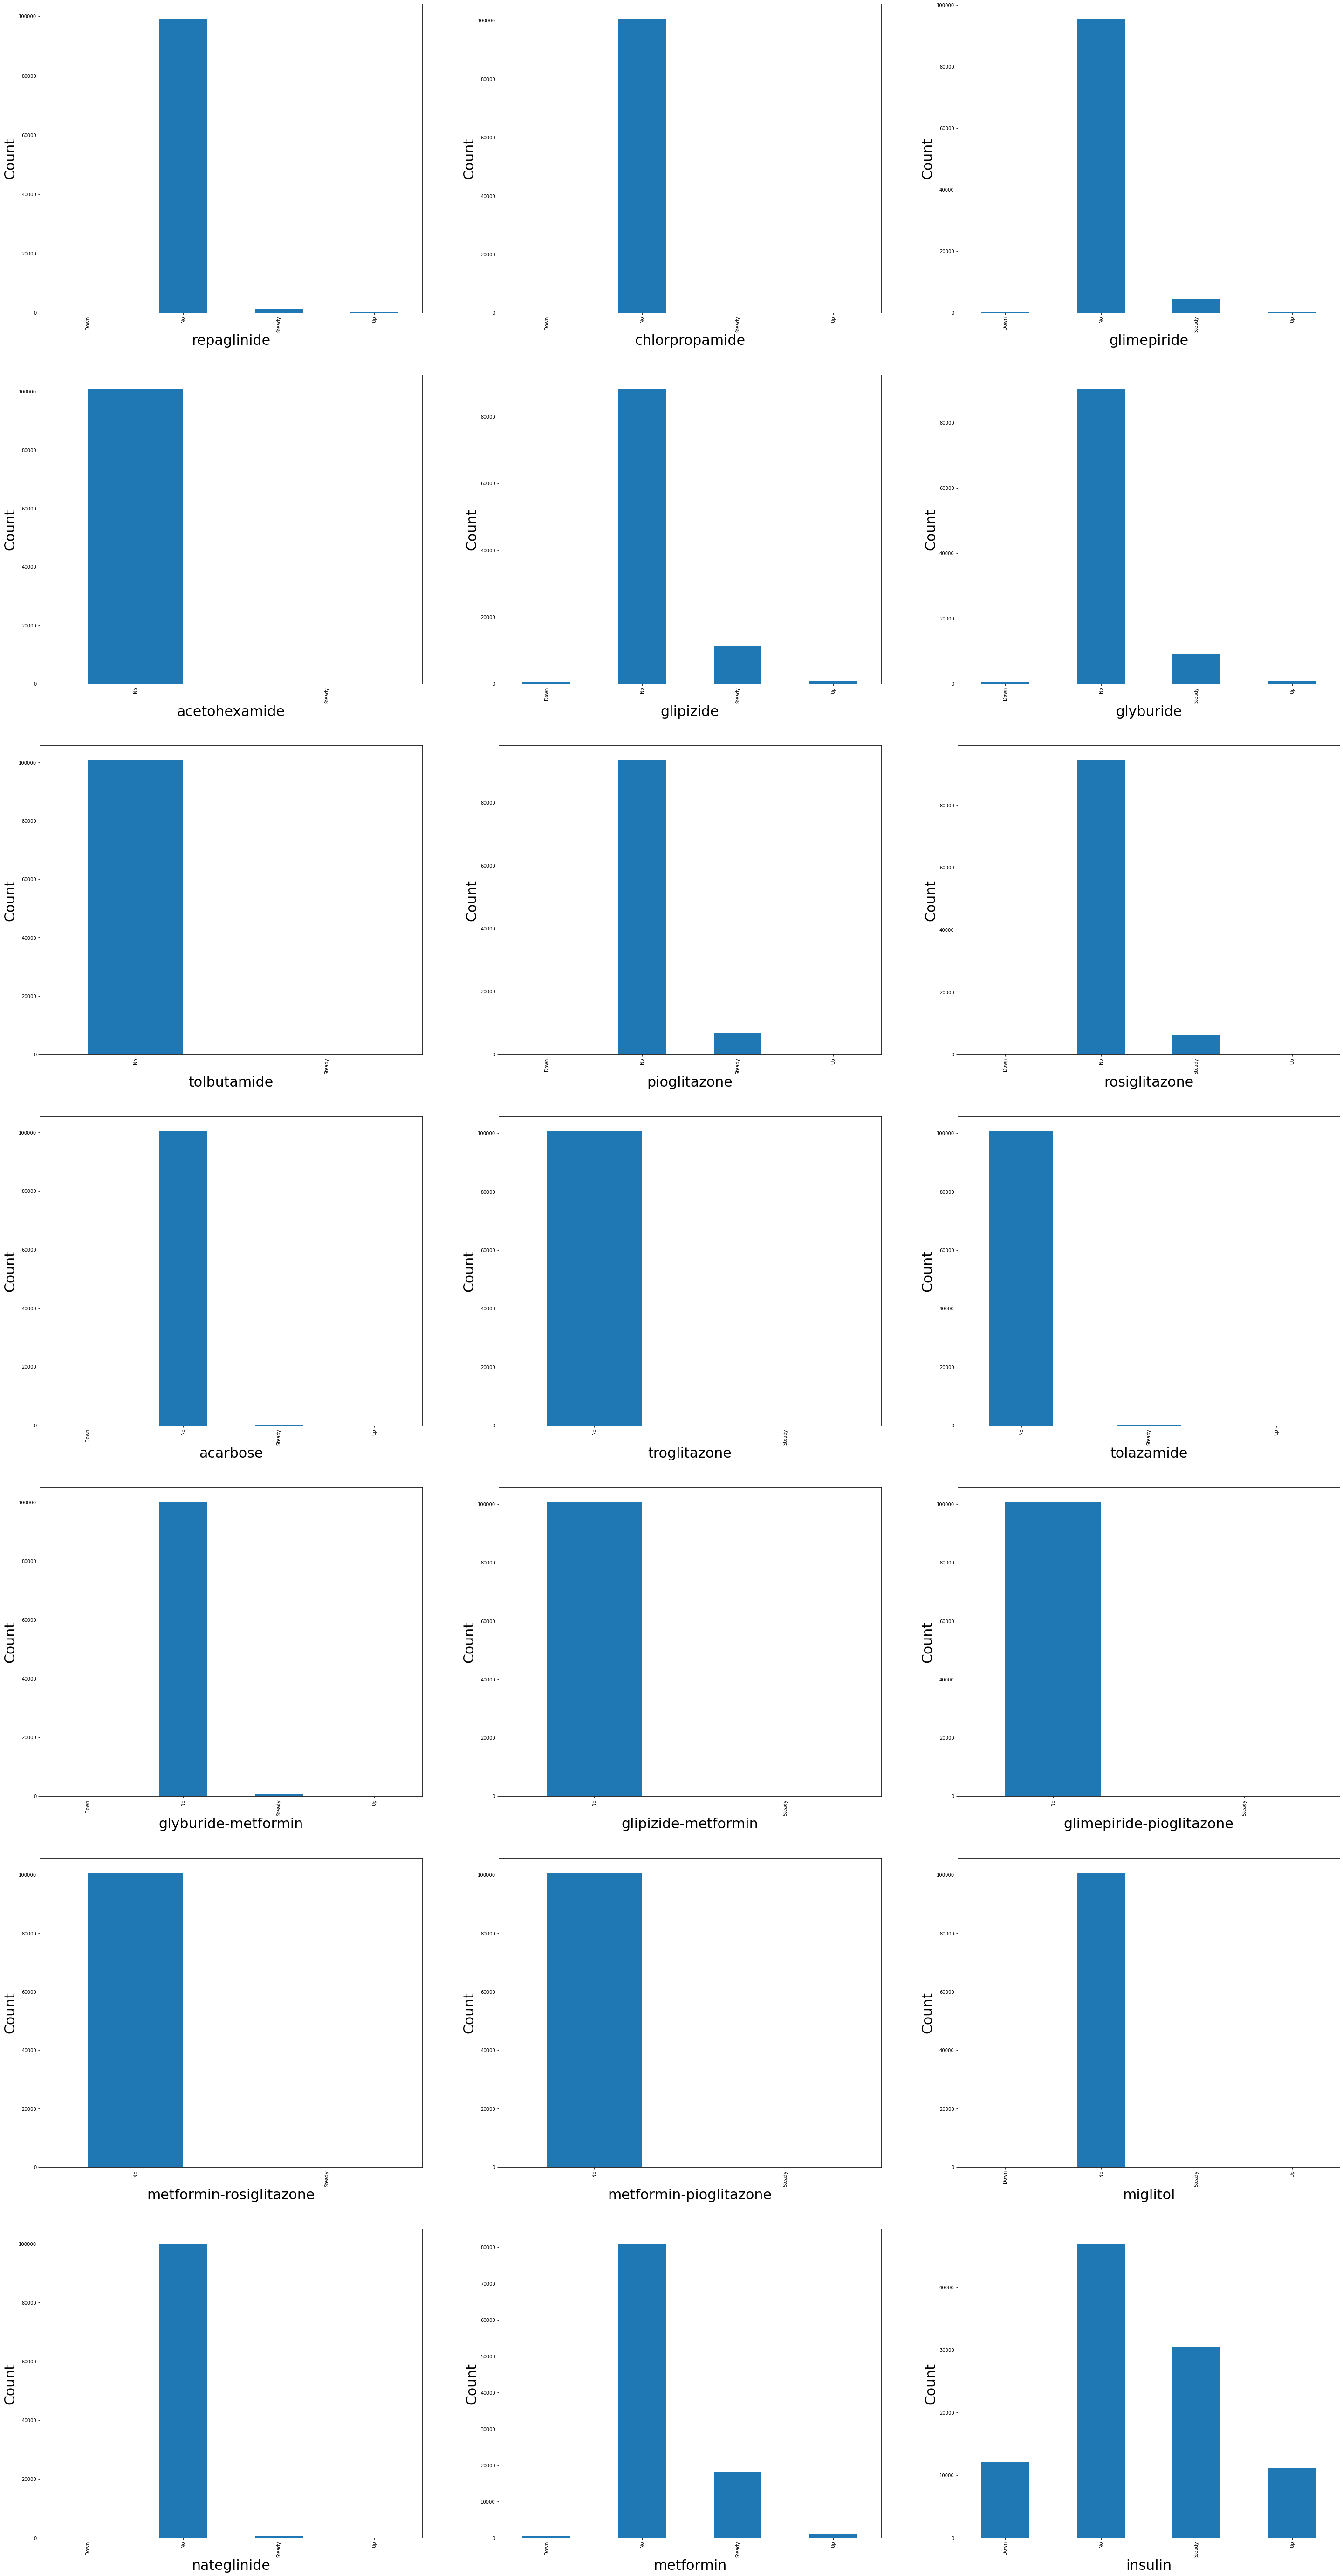

In [29]:
# Comparing diabetes medications
fig = plt.figure(figsize=(50,100))

ax1 = fig.add_subplot(731)
ax1 = df.groupby('repaglinide').size().plot(kind='bar')
plt.xlabel('repaglinide', fontsize=30)
plt.ylabel('Count', fontsize=30)  

ax2 = fig.add_subplot(732)
ax2 = df.groupby('chlorpropamide').size().plot(kind='bar')
plt.xlabel('chlorpropamide', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax3 = fig.add_subplot(733)
ax3 = df.groupby('glimepiride').size().plot(kind='bar')
plt.xlabel('glimepiride', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax4 = fig.add_subplot(734)
ax4 = df.groupby('acetohexamide').size().plot(kind='bar')
plt.xlabel('acetohexamide', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax5 = fig.add_subplot(735)
ax5 = df.groupby('glipizide').size().plot(kind='bar')
plt.xlabel('glipizide', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax6 = fig.add_subplot(736)
ax6 = df.groupby('glyburide').size().plot(kind='bar')
plt.xlabel('glyburide', fontsize=30)
plt.ylabel('Count', fontsize=30)  

ax7 = fig.add_subplot(737)
ax7 = df.groupby('tolbutamide').size().plot(kind='bar')
plt.xlabel('tolbutamide', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax8 = fig.add_subplot(738)
ax8 = df.groupby('pioglitazone').size().plot(kind='bar')
plt.xlabel('pioglitazone', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax9 = fig.add_subplot(739)
ax9 = df.groupby('rosiglitazone').size().plot(kind='bar')
plt.xlabel('rosiglitazone', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax10 = fig.add_subplot(7,3,10)
ax10 = df.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=30)
plt.ylabel('Count', fontsize=30)


ax11 = fig.add_subplot(7,3,11)
ax11 = df.groupby('troglitazone').size().plot(kind='bar')
plt.xlabel('troglitazone', fontsize=30)
plt.ylabel('Count', fontsize=30)  

ax12 = fig.add_subplot(7,3,12)
ax12 = df.groupby('tolazamide').size().plot(kind='bar')
plt.xlabel('tolazamide', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax13 = fig.add_subplot(7,3,13)
ax13 = df.groupby('glyburide-metformin').size().plot(kind='bar')
plt.xlabel('glyburide-metformin', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax14 = fig.add_subplot(7,3,14)
ax14 = df.groupby('glipizide-metformin').size().plot(kind='bar')
plt.xlabel('glipizide-metformin', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax15 = fig.add_subplot(7,3,15)
ax15 = df.groupby('glimepiride-pioglitazone').size().plot(kind='bar')
plt.xlabel('glimepiride-pioglitazone', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax16 = fig.add_subplot(7,3,16)
ax16 = df.groupby('metformin-rosiglitazone').size().plot(kind='bar')
plt.xlabel('metformin-rosiglitazone', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax17 = fig.add_subplot(7,3,17)
ax17 = df.groupby('metformin-pioglitazone').size().plot(kind='bar')
plt.xlabel('metformin-pioglitazone', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax18 = fig.add_subplot(7,3,18)
ax18 = df.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=30)
plt.ylabel('Count', fontsize=30)  

ax19 = fig.add_subplot(7,3,19)
ax19 = df.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax20 = fig.add_subplot(7,3,20)
ax20 = df.groupby('metformin').size().plot(kind='bar')
plt.xlabel('metformin', fontsize=30)
plt.ylabel('Count', fontsize=30)

ax21 = fig.add_subplot(7,3,21)
ax21 = df.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=30)
plt.ylabel('Count', fontsize=30)

The only medication that varied significantly across the patients was the delivery of insulin and metformin 

In [30]:
# Keeping only 'insulin' and 'metformin' as primary medication and removing the other 22 diabetes medications
df.drop([ 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

## Converting categorical to continuous

Converting all nominal values to dummy values

In [31]:
df["discharge_disposition_id"].value_counts()

1     59620
3     13777
6     12774
18     3691
2      2110
22     1982
11     1631
5      1178
25      987
4       809
7       618
23      408
13      392
14      363
28      138
8       108
15       63
24       48
9        21
17       14
16       11
19        7
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [32]:
# original 'discharge_disposition_id' contains 20+ levels, so reducing levels into 2 categories
df['discharge_disposition_id'] = [0 if val == 1 else 1
                                              for val in df['discharge_disposition_id']]

In [33]:
df["admission_source_id"].value_counts()

7     56807
1     29312
17     6762
4      3171
6      2259
2      1103
5       839
3       187
20      161
9       124
8        16
22       11
10        8
11        2
14        2
13        1
25        1
Name: admission_source_id, dtype: int64

In [34]:
# original 'admission_source_id' contains 25 levels so reducing it into 3 categories
df['admission_source_id'] = [0 if val == 7 else 1 if val == 1 else 2
                                              for val in df['admission_source_id']]

In [35]:
df["admission_type_id"].value_counts()

1    53339
3    18688
2    18340
6     5265
5     4785
8      318
7       21
4       10
Name: admission_type_id, dtype: int64

In [36]:
# original 'admission_type_id' contains 8 levels, so reducing it into 2 categories
df['admission_type_id'] = [0 if val == 1 else 1 
                                              for val in df['admission_type_id']]

In [37]:
keys=["insulin","metformin"]
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [38]:
df["change"].value_counts()

No    54266
Ch    46500
Name: change, dtype: int64

In [39]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

<AxesSubplot:xlabel='change', ylabel='count'>

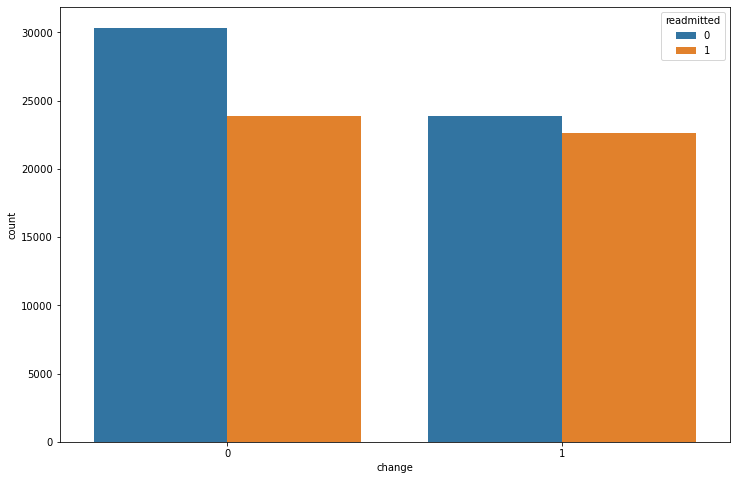

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x ='change', hue = "readmitted", data = df)

In [41]:
df["gender"].value_counts()

Female    54176
Male      46590
Name: gender, dtype: int64

In [42]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [43]:
df['diabetesMed'].value_counts()

Yes    77561
No     23205
Name: diabetesMed, dtype: int64

In [44]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No',0)

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

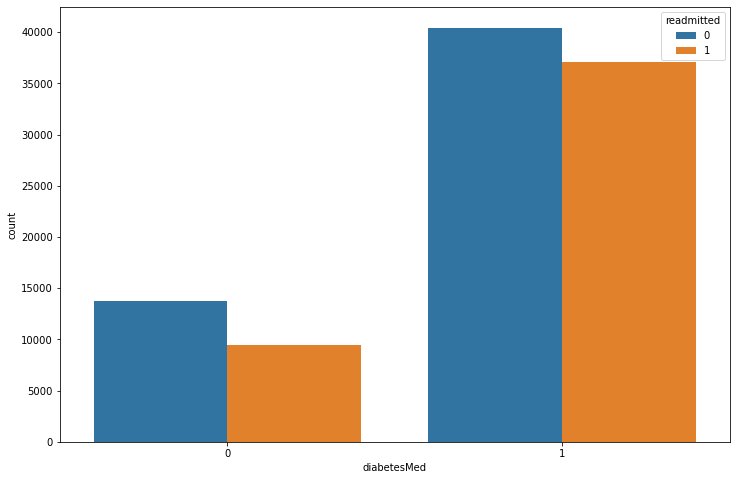

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x ='diabetesMed', hue = "readmitted", data = df)

In [46]:
df["race"].value_counts()

Caucasian          77578
AfricanAmerican    19093
Hispanic            2003
Other               1470
Asian                622
Name: race, dtype: int64

In [47]:
df['race']=df['race'].map({
    'Caucasian':'1',
    'AfricanAmerican':'2',
    'Hispanic':'3',
    'Other':'4',
    'Asian':'5' 
})

In [48]:
df['age']=df['age'].map({
    '[0-10)':'0',
    '[10-20)':'1',
    '[20-30)':'2',
    '[30-40)':'3',
    '[40-50)':'4',
    '[50-60)':'5',
    '[60-70)':'6',
    '[70-80)':'7',
    '[80-90)':'8',
    '[90-100)':'9'
})

Text(0, 0.5, 'Count')

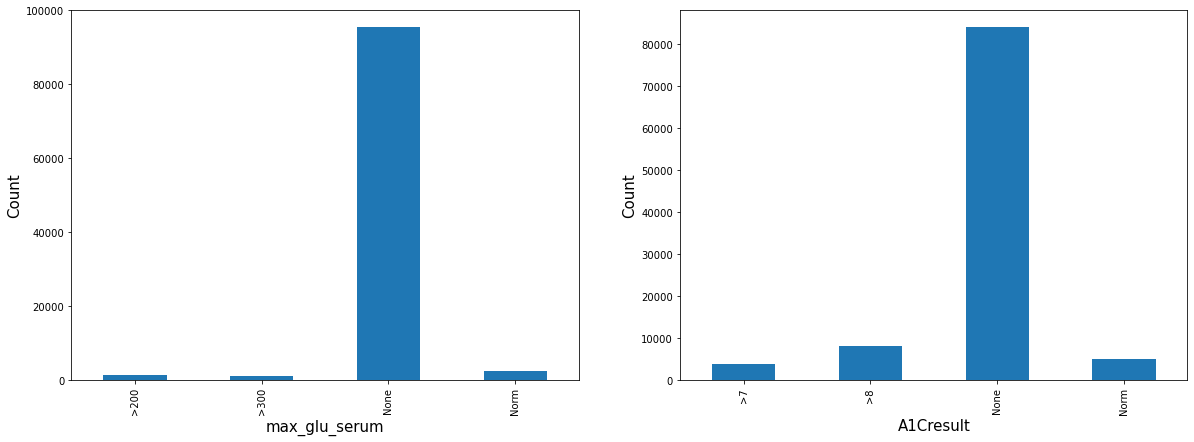

In [49]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1 = df.groupby('max_glu_serum').size().plot(kind='bar')
plt.xlabel('max_glu_serum', fontsize=15)
plt.ylabel('Count', fontsize=15)


ax2 = fig.add_subplot(222)
ax2 = df.groupby('A1Cresult').size().plot(kind='bar')
plt.xlabel('A1Cresult', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [50]:
#maximun of data is none so we wil drop these two columns.
df.drop(["max_glu_serum","A1Cresult"],axis=1,inplace=True)

In [51]:
df.shape

(100766, 19)

In [52]:
df.describe()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,insulin,change,diabetesMed,readmitted
count,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000,100766.000000
mean,0.462358,0.470665,0.408332,0.581605,4.398676,43.100113,1.339648,16.015283,0.367515,0.196922,0.634917,7.414515,0.196088,0.533622,0.461465,0.769714,0.461793
std,0.498584,0.499141,0.491528,0.730793,2.986665,19.656306,1.704756,8.125831,1.259773,0.926085,1.261113,1.933903,0.397038,0.498871,0.498515,0.421018,0.498541
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000


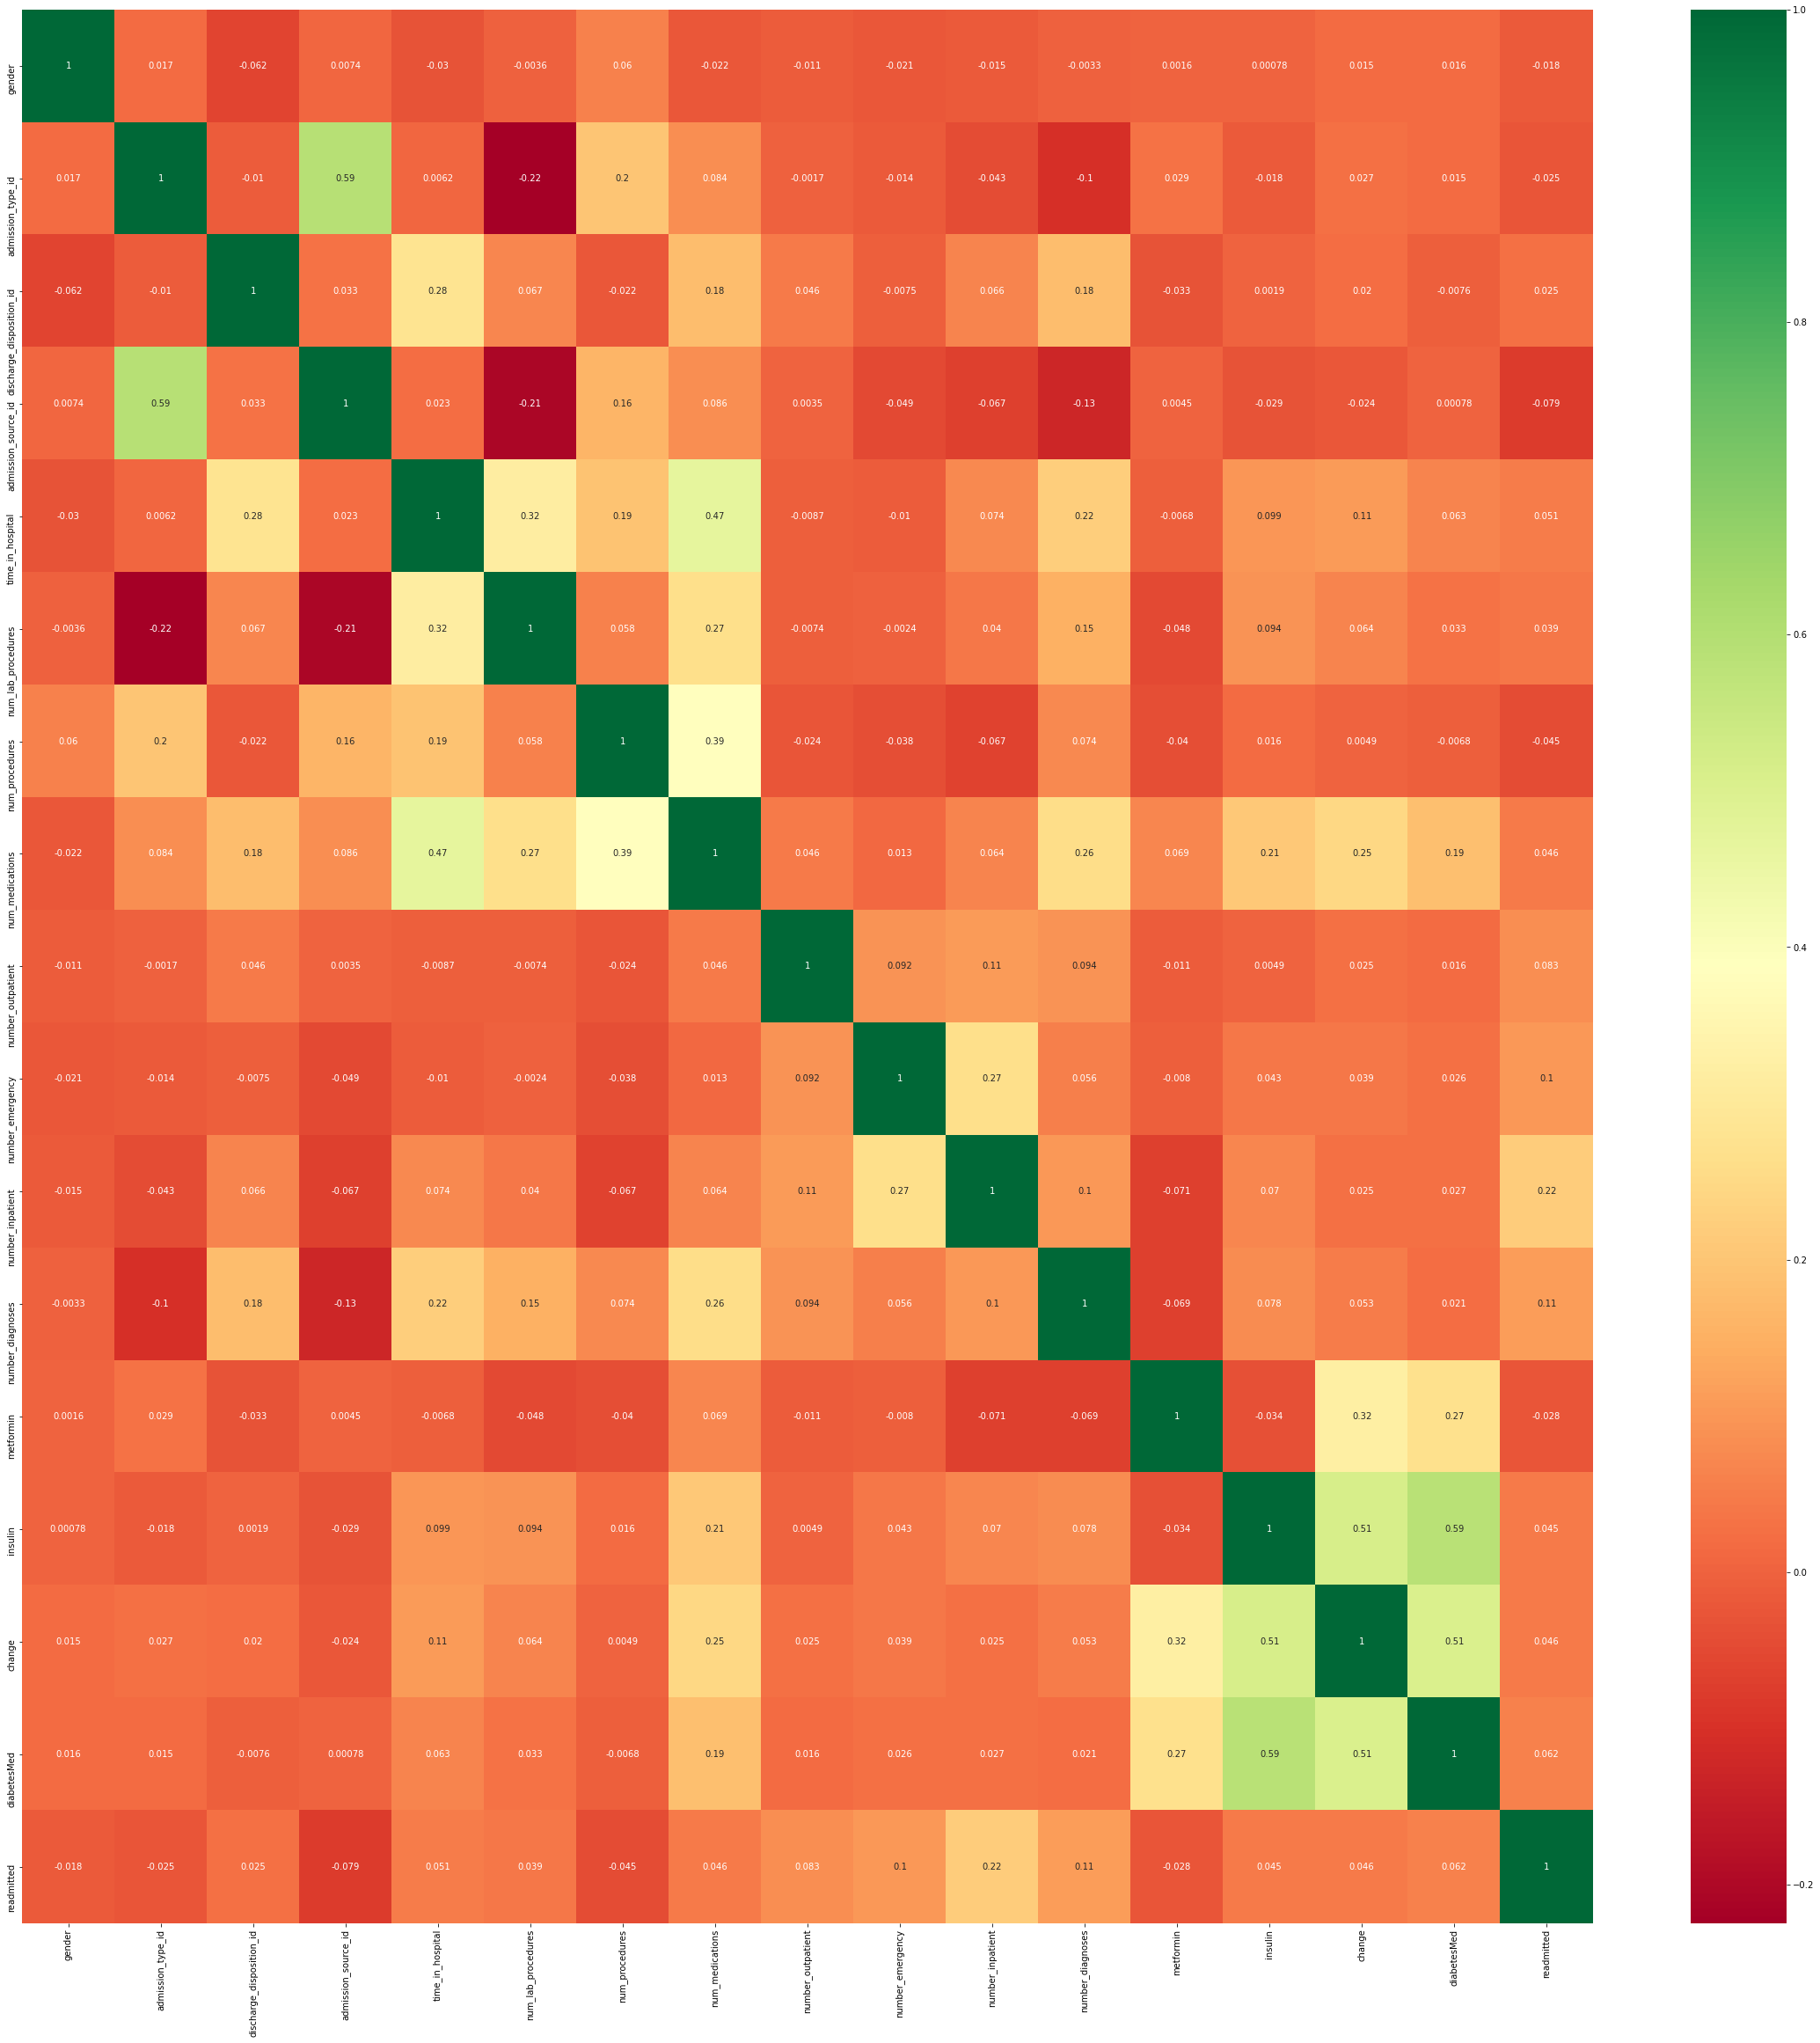

In [53]:
#get correlations of each features in dataset.
plt.figure(figsize=(40,40))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [54]:
# Applying square root transformation on right skewed count data to reduce the effects of extreme values.

df['number_outpatient'] = df['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
df['number_emergency'] = df['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
df['number_inpatient'] = df['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [55]:
# Now perform the feature scaling, features are standardized to have zero mean and unit variance
feature_scale_col = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[feature_scale_col])
data_scaler = scaler.transform(df[feature_scale_col])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_col, index=df.index)
df.drop(feature_scale_col, axis=1, inplace=True)
df = pd.concat([df, data_scaler_df], axis=1)

In [56]:
df.shape

(100766, 19)

In [57]:
df.dtypes

race                         object
gender                        int64
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
metformin                     int64
insulin                       int64
change                        int64
diabetesMed                   int64
readmitted                    int64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_diagnoses            float64
number_inpatient            float64
number_emergency            float64
number_outpatient           float64
dtype: object

# Model Selection

In [58]:
# X (features) and y (response)
x= df.drop(['readmitted'], axis=1)
y = df['readmitted']

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [60]:
print(model.feature_importances_)

[0.04609831 0.03395873 0.08820781 0.01629627 0.02221014 0.01778002
 0.01825448 0.022048   0.0245004  0.00808866 0.12136395 0.16889967
 0.08164364 0.15456726 0.07040215 0.0559205  0.02034491 0.0294151 ]


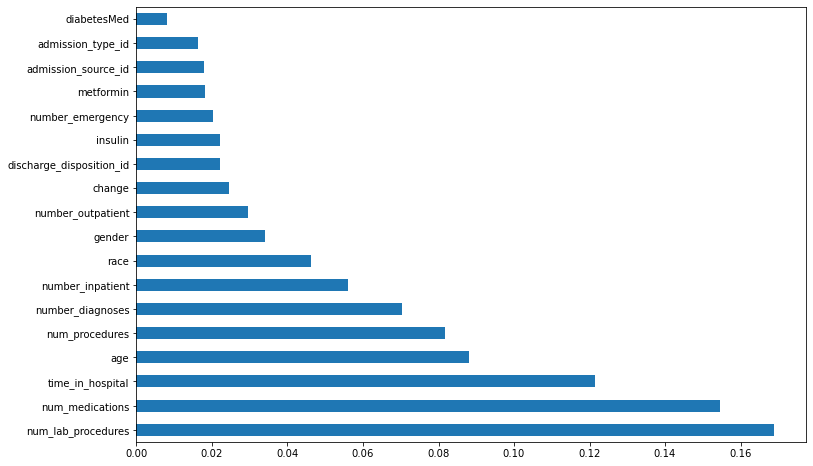

In [61]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

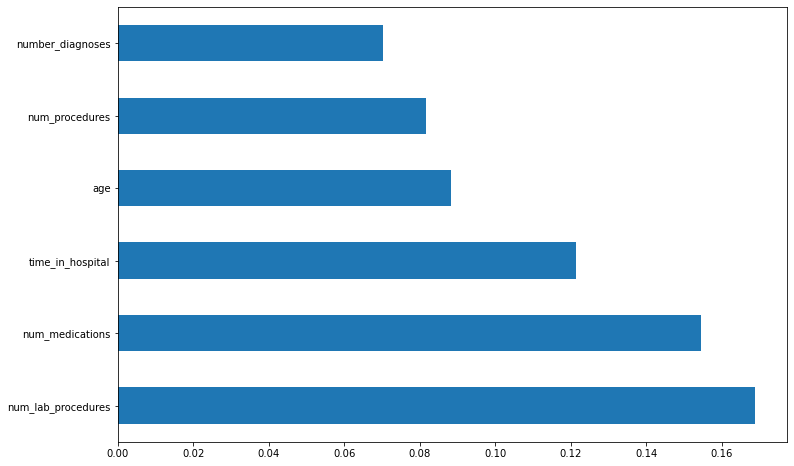

In [62]:
#Finding top 6 features
plt.figure(figsize=(12,8))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [63]:
print(feat_importances.nlargest(6))

num_lab_procedures    0.168900
num_medications       0.154567
time_in_hospital      0.121364
age                   0.088208
num_procedures        0.081644
number_diagnoses      0.070402
dtype: float64


In [64]:
#To access the column of series.
feat_importances[1]

0.03395873210369249

In [65]:
# Now lets make a smaller feature set which only contains the top 6 features
X_cv_top6 = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'age']]

In [66]:
# Model:LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)
logit = LogisticRegression(fit_intercept=True)
logit.fit(x_train,y_train)

LogisticRegression()

In [67]:
logit_pred = logit.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy - {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision - {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall - {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy - 0.62
Precision - 0.63
Recall - 0.44


In [69]:
#Balancing the target variable.
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(x_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 40592, 1: 34982})
New dataset shape Counter({1: 40592, 0: 40592})


In [70]:
x_train, x_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=100)

In [71]:
# Model: Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy').mean()
RF_score

0.6425854362397173

In [72]:
clf1.fit(x_train,y_train)
clf1_pred = clf1.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy - {0:.2f}".format(accuracy_score(y_test, clf1_pred)))
print("Precision - {0:.2f}".format(precision_score(y_test, clf1_pred)))
print("Recall - {0:.2f}".format(recall_score(y_test, clf1_pred)))

Accuracy - 0.65
Precision - 0.65
Recall - 0.62


In [74]:
#model : Decision tree
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
DT_score = cross_val_score(clf4, x_train, y_train, cv=10, scoring='accuracy').mean()
DT_score

0.5750997889210459

In [75]:
clf4.fit(x_train,y_train)
clf4_pred = clf4.predict(x_test)

In [76]:
print("Accuracy - {0:.2f}".format(accuracy_score(y_test, clf4_pred)))
print("Precision - {0:.2f}".format(precision_score(y_test, clf4_pred)))
print("Recall - {0:.2f}".format(recall_score(y_test, clf4_pred)))

Accuracy - 0.59
Precision - 0.59
Recall - 0.56
